## Team 2: Michael Kolor and Nikita Roy


In [184]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
from sklearn.linear_model import LogisticRegression

%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 500)

In [185]:
# Read in Rankings Data
rankings = pd.read_csv('fifa_ranking.csv', encoding = "ISO-8859-1")

# Choose selected columns
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'confederation', 'rank_date']]

# Clean the data
rankings = rankings.replace({"IR Iran": "Iran"})

rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

# Select matches after 2015
rankings = rankings[(rankings['rank_date'] > '2015-01-01') & (rankings['rank_date'] < '2018-06-13')]


In [186]:
# Read in our constructed world cup 
df = pd.read_csv('worldcup_df.csv').drop(['Unnamed: 0'], axis = 1)
df.head()

,team1,team2,score_team1,score_team2,rank_team1,rank_team2,winning_team,goal_difference,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,nationality_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,nationality_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff
0,Australia,Kuwait,4,1,100.0,125.0,2,3,23850784.0,56561.243438,3935794.0,29108.993001,0.0,27.565217,85900000.0,72.869565,4.0,Australia,0.0,27.5,2070000.0,51.391304,0.0,Kuwait,0,0,0,0,0,0,0,0,0,0,0,-25.0
1,Jordan,Kuwait,2,2,103.0,125.0,1,0,9159302.0,4096.099275,3935794.0,29108.993001,0.0,0.000000,0.0,0.000000,0.0,0,0.0,27.5,2070000.0,51.391304,0.0,Kuwait,0,0,0,0,0,0,0,0,0,0,1,-22.0
2,Oman,Kuwait,1,0,93.0,125.0,2,1,4199810.0,16406.711618,3935794.0,29108.993001,0.0,35.000000,950000.0,51.000000,0.0,Oman,0.0,27.5,2070000.0,51.391304,0.0,Kuwait,0,0,0,0,0,0,0,0,0,0,1,-32.0
3,Lebanon,Kuwait,0,1,135.0,125.0,0,1,5851479.0,8452.443641,3935794.0,29108.993001,0.0,22.800000,3020000.0,52.739130,0.0,Lebanon,0.0,27.5,2070000.0,51.391304,0.0,Kuwait,0,0,0,0,0,0,0,0,0,0,0,10.0
4,Australia,Oman,4,0,100.0,93.0,2,4,23850784.0,56561.243438,4199810.0,16406.711618,0.0,27.565217,85900000.0,72.869565,4.0,Australia,0.0,35.0,950000.0,51.000000,0.0,Oman,0,0,0,0,0,0,0,0,0,0,0,7.0


In [187]:
X = df.drop(['team1', 'team2', 'score_team1', 'goal_difference', 'score_team2', 'winning_team', 'nationality_team1', 'nationality_team2'], axis = 1)
y = df['winning_team']

In [188]:
X.shape

(2017, 28)

In [189]:
# Split data into X_traina and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 500, random_state = 42)



In [190]:
X_train.head()

,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff
771,29.0,168.0,45004645.0,2072.463395,1816200.0,3697.548027,0.0,27.391304,175700000.0,75.565217,3.0,0.0,24.826087,57925000.0,69.086957,1.0,0,0,0,0,1,0,0,0,0,1,1,-139.0
1366,2.0,6.0,209288278.0,9821.429177,49065615.0,6301.582075,17.0,27.608696,723500000.0,84.304348,6.0,2.0,27.347826,329000000.0,78.695652,5.0,0,0,1,0,0,0,0,1,0,0,0,-4.0
408,26.0,1.0,125890949.0,9290.739400,43417765.0,13698.286865,0.0,27.913043,264000000.0,78.217391,2.0,16.0,28.695652,741500000.0,83.782609,4.0,0,1,0,0,0,0,0,1,0,0,1,25.0
1626,156.0,163.0,35530081.0,585.850064,5612253.0,57714.254863,0.0,22.000000,690000.0,50.826087,1.0,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,-7.0
1601,203.0,162.0,33400.0,49664.025569,3549750.0,2289.877719,0.0,22.000000,70000.0,50.173913,0.0,0.0,26.500000,18240000.0,55.130435,0.0,0,0,0,0,1,0,0,0,0,1,0,41.0


In [191]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", (score))
print("Test set accuracy: ", (score2))


Training set accuracy:  0.561634805537
Test set accuracy:  0.52


Text(0.5,1,'Logistic Regression Model Predictions for classifying match results')

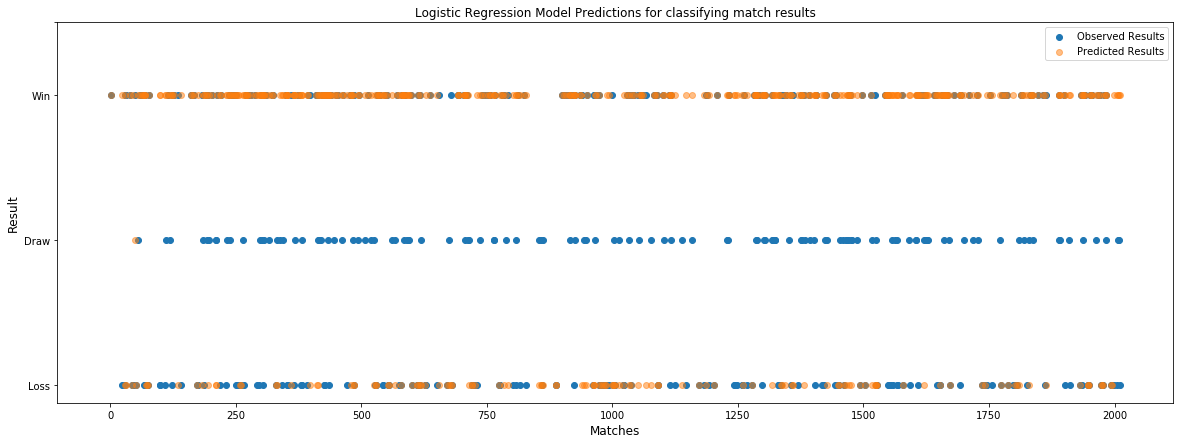

In [192]:
fig, ax = plt.subplots(1,1,figsize = (20, 7))
ax.scatter(X_test.index, y_test, label = 'Observed Results')
ax.scatter(X_test.index, logreg.predict(X_test),alpha = 0.5, label = 'Predicted Results')
ax.set_yticks([0,1,2,2.5])
ax.set_yticklabels(["Loss", "Draw", "Win", ])
ax.legend(loc = 1)
ax.set_xlabel('Matches', fontsize = 12)
ax.set_ylabel('Result', fontsize = 12)
ax.set_title('Logistic Regression Model Predictions for classifying match results', fontsize = 12)

In [193]:
# READ IN PREDICTION DATA SET
world_cup = pd.read_csv('worldcup_2018_prediction_df.csv')
world_cup.head()

,Unnamed: 0,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group
0,0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,85700000,72.478261,0.0,0.0,29.130435,216200000.0,78.478261,0.0,0,0,0,0,0,0,0,0,0,1,1,-3.0,A
1,1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,400500000,79.217391,0.0,1.0,27.173913,92320000.0,71.652174,4.0,0,0,1,0,0,1,0,0,0,0,0,-31.0,A
2,2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,905500000,85.695652,11.0,11.0,27.086957,545000000.0,82.434783,4.0,0,0,0,0,1,0,0,0,0,1,0,6.0,B
3,3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,232300000,76.608696,1.0,0.0,25.000000,44780000.0,62.695652,0.0,0,0,0,0,0,0,0,0,0,0,0,4.0,B
4,4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,811000000,84.347826,7.0,0.0,27.565217,85900000.0,72.869565,4.0,0,0,0,0,1,0,0,0,0,0,0,-29.0,C


In [194]:
world_cup_pred_df = world_cup.drop(['Group','Unnamed: 0', 'team1', 'team2'], axis = 1)

In [195]:
world_cup = world_cup.drop(['Unnamed: 0'], axis = 1)

In [196]:
predictions

array([0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 1])

In [223]:
logreg.coef_

array([[ -1.23161414e-07,  -2.06008363e-07,  -3.05134200e-09,
         -1.04132406e-05,  -2.95139761e-09,  -7.86675316e-06,
          1.47453980e-09,  -3.46299952e-08,  -5.06145469e-09,
         -8.08059130e-08,  -8.44153594e-10,   5.90725698e-11,
         -2.53994744e-08,   3.32782578e-09,  -5.33517348e-08,
          1.02982128e-09,  -7.91368429e-10,  -1.99936756e-10,
         -7.45460357e-11,  -4.64334615e-11,  -8.90761355e-11,
         -8.16169174e-10,  -2.43394490e-10,  -8.83811659e-12,
         -6.92297152e-11,  -1.04085363e-10,  -1.45503931e-10,
          8.28469497e-08],
       [ -2.24916112e-07,  -2.32268483e-07,  -4.73109544e-09,
         -2.05522900e-05,  -1.84108526e-09,  -2.11947383e-05,
          1.12230552e-09,  -3.28674219e-08,  -8.77331812e-10,
         -7.49957224e-08,  -5.24585711e-10,   1.22692137e-09,
         -3.73408990e-08,   7.22583604e-10,  -8.26372226e-08,
         -1.19468591e-09,  -6.04935492e-10,  -2.28049295e-10,
         -4.97665130e-11,  -1.02837440e-10,

In [197]:
prob = logreg.predict_proba(world_cup_pred_df)
predictions = logreg.predict(world_cup_pred_df);


def match_points(world_cup, prob, predictions):

    for i in range(world_cup.shape[0]):
        print(str(world_cup.iloc[i,0]) + ' and ' +  str(world_cup.iloc[i,1]))
        if predictions[i] == 2:
            print("Winner: " + str(world_cup.iloc[i,0]))
            world_cup.at[i,'points_team1'] = 3
            world_cup.at[i,'points_team2'] = 0
        elif predictions[i] == 1:
            print("Draw")
            world_cup.at[i,'points_team1'] = 1
            world_cup.at[i,'points_team2'] = 1
        elif predictions[i] == 0:
            print("Winner: " + world_cup.iloc[i,1])
            world_cup.at[i,'points_team1'] = 0
            world_cup.at[i,'points_team2'] = 3

        print('Probability of '  + str(world_cup.iloc[i,0]) +' winning ' + str(prob[i][2]))
        print('Probability of '  + ' Draw ' + str(prob[i][1]))
        print('Probability of '  + str(world_cup.iloc[i,1]) +' winning ' + str(prob[i][0]) +'\n')
    
match_points(world_cup, prob, predictions)


Saudi Arabia and Russia
Winner: Russia
Probability of Saudi Arabia winning 0.336920160791
Probability of  Draw 0.280364347968
Probability of Russia winning 0.382715491241

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning 0.64395713615
Probability of  Draw 0.26673020713
Probability of Egypt winning 0.0893126567197

Spain and Portugal
Winner: Spain
Probability of Spain winning 0.771469450569
Probability of  Draw 0.189969968501
Probability of Portugal winning 0.03856058093

Morocco and Iran
Winner: Morocco
Probability of Morocco winning 0.548334703293
Probability of  Draw 0.289437290019
Probability of Iran winning 0.162228006688

France and Australia
Winner: France
Probability of France winning 0.941686872124
Probability of  Draw 0.0509403717446
Probability of Australia winning 0.00737275613115

Peru and Denmark
Winner: Denmark
Probability of Peru winning 0.240445280361
Probability of  Draw 0.217796283735
Probability of Denmark winning 0.541758435904

Iceland and Argentina

In [198]:
world_cup

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2
0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,85700000,72.478261,0.0,0.0,29.130435,216200000.0,78.478261,0.0,0,0,0,0,0,0,0,0,0,1,1,-3.0,A,0.0,3.0
1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,400500000,79.217391,0.0,1.0,27.173913,92320000.0,71.652174,4.0,0,0,1,0,0,1,0,0,0,0,0,-31.0,A,3.0,0.0
2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,905500000,85.695652,11.0,11.0,27.086957,545000000.0,82.434783,4.0,0,0,0,0,1,0,0,0,0,1,0,6.0,B,3.0,0.0
3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,232300000,76.608696,1.0,0.0,25.000000,44780000.0,62.695652,0.0,0,0,0,0,0,0,0,0,0,0,0,4.0,B,3.0,0.0
4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,811000000,84.347826,7.0,0.0,27.565217,85900000.0,72.869565,4.0,0,0,0,0,1,0,0,0,0,0,0,-29.0,C,3.0,0.0
5,Peru,Denmark,11.0,12.0,32165485.0,6571.920181,5769603.0,56307.513706,0.0,26.043478,60700000,70.826087,2.0,2.0,25.652174,309500000.0,77.608696,11.0,0,0,1,0,0,0,0,0,0,1,0,-1.0,C,0.0,3.0
6,Iceland,Argentina,22.0,5.0,341284.0,70056.873393,44271041.0,14401.965384,0.0,27.478261,73350000,71.173913,3.0,16.0,28.695652,741500000.0,83.782609,4.0,0,0,0,0,1,0,0,1,0,0,0,17.0,D,0.0,3.0
7,Nigeria,Croatia,48.0,20.0,190886311.0,1968.559181,4125700.0,13294.514926,0.0,24.565217,171900000,74.739130,7.0,6.0,26.304348,431300000.0,79.956522,3.0,0,0,0,0,0,0,0,0,0,1,0,28.0,D,0.0,3.0
8,Switzerland,Brazil,6.0,2.0,8466017.0,80189.657073,209288278.0,9821.429177,2.0,27.565217,258600000,77.956522,12.0,17.0,27.608696,723500000.0,84.304348,6.0,0,0,0,0,1,0,0,1,0,0,0,4.0,E,0.0,3.0
9,Serbia,Costa Rica,34.0,23.0,7022268.0,5900.038107,4905769.0,11630.668396,1.0,27.043478,261900000,78.347826,8.0,1.0,27.304348,92175000.0,71.826087,0.0,0,0,0,0,1,0,1,0,0,0,0,11.0,E,3.0,0.0


In [199]:
fifa_countries['total_points'] = 0
for i in range(len(fifa_countries['Team'])):
    for j in range(len(world_cup['team1'])):
        if fifa_countries.iloc[i, 0] == world_cup.iloc[j, 0]:
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup.iloc[j, 31]
        elif fifa_countries.iloc[i, 0] == (world_cup.iloc[j, 1]):
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup.iloc[j, 32]


In [202]:
fifa_countries = pd.read_csv('world_cup_2018.csv', encoding = "ISO-8859-1")

fifa_countries = fifa_countries[['Team', 'Group']]
fifa_countries.head()


,Team,Group
0,Russia,A
1,Saudi Arabia,A
2,Egypt,A
3,Uruguay,A
4,Portugal,B


In [203]:
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
rankings = rankings.loc[rankings['rank_date'] == '2018-06-07']
rankings.head()

fifa_countries = fifa_countries.merge(rankings, left_on = 'Team', right_on = 'country_full', how = 'left')

fifa_countries.head()


,Team,Group,rank,country_full,country_abrv,confederation,rank_date
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07


In [204]:
# Read in GDP data
gdp = pd.read_csv('gdp_data.csv', encoding = "ISO-8859-1")

# Only select columns from 2015 onwards
gdp = gdp.drop(gdp.columns[[range(5,59)]], axis = 1)
gdp.head()
gdp.columns

# Transform data from wide format to long format
gdp = pd.melt(gdp, id_vars = ['Country Name', 'Country Code'], value_vars = [ '2015', '2016', '2017'])

gdp.columns = ['Country', 'Country Code', 'Year', 'GDP']
gdp = gdp.fillna(0)
gdp.head()
gdp['Year'] = gdp['Year'].astype('int64')

# Read in population data
population = pd.read_csv('population_data.csv', encoding = "ISO-8859-1")

# Only select columns from 2015 onwards
population = population.drop(population.columns[[range(4,59)]], axis = 1)
population.head()
population.columns

# Transform data from wide format to long format
population = pd.melt(population, id_vars = ['Country Name'], value_vars = ['2015', '2016', '2017'])

population.columns = ['Country',  'Year', 'population']
population = population.fillna(0)
population.head()
population['Year'] = population['Year'].astype('int64')

# Merge GDP and population data
gdp = gdp.merge(population, left_on=['Country', 'Year'], right_on=['Country', 'Year']) 
gdp = gdp[(gdp['Year']) == 2017]



In [205]:
# Merge GDP and Dataframe
fifa_countries = fifa_countries.merge(gdp, 
                left_on=['Team'], 
                right_on=['Country'], how = 'left')

In [206]:
fifa_countries.head()

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0


In [207]:
# Read in player data
player_data = pd.read_csv("complete.csv", encoding = "ISO-8859-1")

countries = []
sizes = []

# data for players in top 200
for country, player_df in player_data.sort_values(by="overall", ascending=False).head(200).groupby("nationality"):
    countries.append(country)
    sizes.append(player_df["overall"].size)

top_200_df = pd.DataFrame()
top_200_df["country"] = countries
top_200_df["players_in_top_200"] = sizes 
top_200_df

team_roster_data = pd.DataFrame()
# hOW MNY PLAYERS IN TOP 200

# Get top 23 players
for country, curr_df in player_data.groupby("nationality"):
    #print(country)
    country_df = curr_df.sort_values(by="overall", ascending=False)
    country_df["nationality"] = country
    country_df = country_df.head(23)
    country_df["number_of_players"] = country_df["nationality"].size
    #print(country_df.head(23)["eur_value"].mean()/23)
    team_roster_data = team_roster_data.append(country_df)

# Merge players in top 200
top_200_team_roster_merged_df = pd.merge(team_roster_data, top_200_df, left_on="nationality", right_on="country", how="left")
top_200_team_roster_merged_df[top_200_team_roster_merged_df["nationality"] == "Spain"]
top_200_team_roster_merged_df["players_in_top_200"].fillna(0, inplace=True)
top_200_team_roster_merged_df = top_200_team_roster_merged_df.drop("country", axis = 1)
top_200_team_roster_merged_df["epl"] = top_200_team_roster_merged_df["league"] == "English Premier League"
top_200_team_roster_merged_df["laliga"] = top_200_team_roster_merged_df["league"] == "Spanish Primera División"
top_200_team_roster_merged_df["bundesliga"] = top_200_team_roster_merged_df["league"] == "German Bundesliga"
top_200_team_roster_merged_df[top_200_team_roster_merged_df["nationality"] == "Belgium"]

country_player_data = top_200_team_roster_merged_df.groupby("nationality").agg({
    "laliga": np.sum,
    "epl": np.sum,
    "bundesliga": np.sum,
    "players_in_top_200": np.median,
    "number_of_players": np.median,
    "age": np.mean,
    "overall": np.sum,
    "eur_value": np.sum,  
})

# mean imputate 50 for players not listed in dataset
country_player_data["overall_average"] = (country_player_data["overall"] + (23-country_player_data["number_of_players"]) * 50)/23
country_player_data["top_3_leagues"] = country_player_data["laliga"] + country_player_data["epl"] + country_player_data["bundesliga"]

# drop overall and number of players
country_player_data_cleaned = country_player_data.copy().drop(["overall","number_of_players"], axis = 1)

country_player_data_cleaned = country_player_data_cleaned.drop(['laliga', 'epl', 'bundesliga'], axis = 1)

country_player_data_cleaned['nationality'] = country_player_data_cleaned.index

In [208]:
# Merge Player Data and Dataframe
fifa_countries = fifa_countries.merge(country_player_data_cleaned, left_on='Team', right_on= 'nationality', how ='left')


In [209]:
fifa = fifa_countries[['Team', 'Group', 'rank', 'confederation', 'GDP', 'population', 'players_in_top_200', 'age', 'eur_value', 'overall_average', 'top_3_leagues' ]]

In [210]:
fifa_countries['host'] = 0
fifa_countries.at[0,'host'] = 1

In [211]:
fifa_countries.head()

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0


In [212]:
world_cup = world_cup.fillna(0)

In [213]:
world_cup.shape

(48, 33)

In [214]:
world_cup.head()



,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2
0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,85700000,72.478261,0.0,0.0,29.130435,216200000.0,78.478261,0.0,0,0,0,0,0,0,0,0,0,1,1,-3.0,A,0.0,3.0
1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,400500000,79.217391,0.0,1.0,27.173913,92320000.0,71.652174,4.0,0,0,1,0,0,1,0,0,0,0,0,-31.0,A,3.0,0.0
2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,905500000,85.695652,11.0,11.0,27.086957,545000000.0,82.434783,4.0,0,0,0,0,1,0,0,0,0,1,0,6.0,B,3.0,0.0
3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,232300000,76.608696,1.0,0.0,25.000000,44780000.0,62.695652,0.0,0,0,0,0,0,0,0,0,0,0,0,4.0,B,3.0,0.0
4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,811000000,84.347826,7.0,0.0,27.565217,85900000.0,72.869565,4.0,0,0,0,0,1,0,0,0,0,0,0,-29.0,C,3.0,0.0


In [215]:
fifa_countries = pd.read_csv('fifa_countries.csv').drop(['Unnamed: 0'], axis = 1)

In [216]:
fifa_countries.head()

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0


In [217]:
fifa_countries['total_points'] = 0

In [218]:
fifa_countries['total_points'] = 0
for i in range(len(fifa_countries['Team'])):
    for j in range(len(world_cup['team1'])):
        if fifa_countries.iloc[i, 0] == world_cup.iloc[j, 0]:
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup.iloc[j, 31]
        elif fifa_countries.iloc[i, 0] == (world_cup.iloc[j, 1]):
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup.iloc[j, 32]


In [219]:
fifa_countries.head()

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host,total_points
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1,6.0
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0,3.0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0,0.0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0,9.0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0,6.0


In [221]:
knockout_countries = pd.DataFrame(index=range(16), columns= fifa_countries.columns)

for group, group_df in fifa_countries.groupby("Group"):
    # Store group num
    group_num = ord(group) - 65 
    
    # Sort group
    group_df = group_df.sort_values(by=["total_points","rank"], ascending=[False,True])
    
    print(group_df["rank"])
    print()
    if group_num % 2 == 0:
        # Assign the team to their proper place in the knockout countries bracket
        #print(group_data.iloc[group_num, :])
        knockout_countries.loc[group_num, :] = group_df.iloc[0, :]
        knockout_countries.loc[group_num + 8, :] = group_df.iloc[1, :]
    else:
        # Assign the team to their proper place in the knockout countries bracket
        knockout_countries.loc[group_num + 8, :] = group_df.iloc[0, :]
        knockout_countries.loc[group_num, :] = group_df.iloc[1, :]

knockout_countries_orig = knockout_countries.copy()
knockout_countries_orig

3    14
0    70
1    67
2    45
Name: rank, dtype: int64

5    10
4     4
6    41
7    37
Name: rank, dtype: int64

8      7
11    12
10    11
9     36
Name: rank, dtype: int64

12     5
14    20
15    48
13    22
Name: rank, dtype: int64

16     2
17     6
19    34
18    23
Name: rank, dtype: int64

20     1
22    24
21    15
23    57
Name: rank, dtype: int64

24     3
27    12
26    21
25    55
Name: rank, dtype: int64

29    27
28     8
30    16
31    61
Name: rank, dtype: int64



,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host,total_points
0,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.6157e+10,3.45675e+06,4,27.1304,400500000,79.2174,0,Uruguay,0,9
1,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.17571e+11,1.02937e+07,11,27.087,545000000,82.4348,4,Portugal,0,6
2,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.5825e+12,6.71186e+07,20,26.7391,811000000,84.3478,7,France,0,9
3,Croatia,D,20,Croatia,CRO,UEFA,2018-06-07,Croatia,HRV,2017,5.48492e+10,4.1257e+06,6,26.3043,431300000,79.9565,3,Croatia,0,6
4,Brazil,E,2,Brazil,BRA,CONMEBOL,2018-06-07,Brazil,BRA,2017,2.05551e+12,2.09288e+08,17,27.6087,723500000,84.3043,6,Brazil,0,9
5,Sweden,F,24,Sweden,SWE,UEFA,2018-06-07,Sweden,SWE,2017,5.3804e+11,1.00677e+07,2,28.4783,203500000,77.0435,7,Sweden,0,6
6,Belgium,G,3,Belgium,BEL,UEFA,2018-06-07,Belgium,BEL,2017,4.92681e+11,1.13721e+07,11,26.0435,734000000,83,15,Belgium,0,9
7,Poland,H,8,Poland,POL,UEFA,2018-06-07,Poland,POL,2017,5.2451e+11,3.79758e+07,3,28.4783,292550000,77.5217,7,Poland,0,6
8,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.57752e+12,1.44495e+08,0,29.1304,216200000,78.4783,0,Russia,1,6
9,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.31132e+12,4.6572e+07,32,28.1739,905500000,85.6957,11,Spain,0,9


In [222]:
knockout_countries = knockout_countries_orig.copy()

#matches = pd.DataFrame(index=range(8), columns=wc_predictors.columns)
team1_columns = ["rank_team1", "population_team1", 'GDP_per_capita_team1', 
        'players_in_top_200_team1', 'age_team1', 'eur_value_team1', 
        'overall_average_team1', 'top_3_leagues_team1', 'confederation_team1_CAF',
        'confederation_team1_CONCACAF',
        'confederation_team1_CONMEBOL', 'confederation_team1_OFC',
        'confederation_team1_UEFA']

team2_columns = ["rank_team2", "population_team2", 'GDP_per_capita_team2', 
        'players_in_top_200_team2', 'age_team2', 'eur_value_team2', 
        'overall_average_team2', 'top_3_leagues_team2', 'confederation_team2_CAF',
        'confederation_team2_CONCACAF',
        'confederation_team2_CONMEBOL', 'confederation_team2_OFC',
        'confederation_team2_UEFA']

for num_matches in [2, 4, 8, 16]:
    if(num_matches) == 16:
        print(matches)
    # Initialize matches
    matches = pd.DataFrame(index=range(int(16/num_matches)), columns=world_cup.columns)
    matches["knockout_index1"] = np.nan
    matches["knockout_index2"] = np.nan
    
    for bracket_pos in knockout_countries.index:
        #print(int(bracket_pos/num_matches))
        #print(bracket_pos)
        match_num = int(bracket_pos/num_matches)
        ###########################################
        # Set rank_team1
        team_name = knockout_countries.loc[bracket_pos, ["country_full"]].values
        #print(team_name)
        # Get Team's Data
        team_df = world_cup[world_cup["team1"] == team_name[0]].head(1)
        
        # If only team 2
        if(len(team_df) == 0):
            team_df = team_df = world_cup[world_cup["team2"] == team_name[0]].head(1)
            #
            use_team2_columns = True
        else:
            use_team2_columns = False
    
            
        #print("\033[1mmatch {0}\033[0m".format(match_num))
        
        # Team 1
        if bracket_pos % num_matches < num_matches/2:
            
            #print("Team 1")
            #print(matches.loc[match_num, team1_columns])
            
            if(use_team2_columns):
                
                #print(team_df.loc[0, team2_columns])
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team2_columns].values
                #print(matches.loc[match_num, team1_columns])
            else:
                #print(team_df.loc[0, team1_columns])
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team1_columns].values
            
        # Team 2
        else:
            #print("Team 2")
            if(use_team2_columns):
                #print(team_df.loc[0, team2_columns])
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team2_columns].values
            else:
                #print(team_df.loc[0, team1_columns])
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team1_columns].values
                #print()

        
    #HOST TEam1
    matches["host_team1"] = 0
    matches.loc[matches[matches["rank_team1"] == 70]["host_team1"].index, ["host_team1"]] = 1

    # Rank Difference
    matches["rank_diff"] = matches["rank_team1"] - matches["rank_team2"]
    #
    # RUN PREDICTIONSSSS
    # round of 16
    #print(matches)
    if(num_matches) == 2:
        print("\033[1m\n\nROUND OF 16:\n\n\033[0m")
    elif(num_matches) == 4:
        print("\033[1m\n\nQUARTERFINALS:\n\n\033[0m")
    elif(num_matches) == 8:
        print("\033[1mSEMIS:\033[0m")
    else:
        print("\033[1mFINALS:\033[0m")
        
    # Run results
    round_predictors = matches.copy().drop(["knockout_index1", "knockout_index2"], axis = 1)
   
    #print(round16_predictors["predicted_goal_difference"])

    for match in range(len(matches[['rank_team1']])):
        print()
        print(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0])
        print(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0])
        #print("Goal Difference: {0}".format(predictions[match]))

        if predictions[match] == 2:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
            knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index2"]], axis=0)

        elif predictions[match] == 1:
            # Settle ties with higher team
            if round_predictors.loc[match, "rank_diff"] > 0:
                print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
                knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index1"]])
            else:
                print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
                knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index2"]])
        else:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
            knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index1"]], axis = 0)
        
        
        
                    
            
matches



ROUND OF 16:



Uruguay
Portugal
Winner: Portugal

France
Croatia
Winner: France

Brazil
Sweden
Winner: Brazil

Belgium
Poland
Winner: Belgium

Russia
Spain
Winner: Russia

Denmark
Argentina
Winner: Argentina

Switzerland
Germany
Winner: Germany

England
Senegal
Winner: Senegal


QUARTERFINALS:



Portugal
France
Winner: France

Brazil
Belgium
Winner: Brazil

Russia
Argentina
Winner: Russia

Germany
Senegal
Winner: Germany
SEMIS:

France
Brazil
Winner: Brazil

Russia
Germany
Winner: Russia
  team1 team2 rank_team1 rank_team2 population_team1 GDP_per_capita_team1 population_team2 GDP_per_capita_team2 players_in_top_200_team1 age_team1 eur_value_team1 overall_average_team1 top_3_leagues_team1 players_in_top_200_team2 age_team2 eur_value_team2 overall_average_team2 top_3_leagues_team2 confederation_team1_CAF confederation_team1_CONCACAF confederation_team1_CONMEBOL confederation_team1_OFC confederation_team1_UEFA confederation_team2_CAF confederation_team2_CONCACAF confederation_team2_C

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2,knockout_index1,knockout_index2
0,NaN,NaN,2,70,2.09288e+08,9821.43,1.44495e+08,10917.5,17,27.6087,7.235e+08,84.3043,6,0,29.1304,216200000,78.4783,0,0,0,1,0,0,0,0,0,0,1,0,-68,NaN,NaN,NaN,4.0,8.0
